In [1]:
import pandas as pd
import math
import glob
import os
import datetime as dt
import matplotlib.pyplot as plt

# inputs

In [2]:
input_dir = './Inputs_Assessment_Task_3_Laboratory_Report/'
output_dir = './Outputs_Assessment_Task_3_Laboratory_Report/'

print(
    input_dir,
    output_dir,
    sep='\n'
    )

./Inputs_Assessment_Task_3_Laboratory_Report/
./Outputs_Assessment_Task_3_Laboratory_Report/


# create output directory

In [3]:
def create_output_dir(arg_output_dir):
    """create output directory if it does not exist

    arguments:
        [string] --> arg_output_dir = path of the output directory name
    """
    if not os.path.exists(arg_output_dir):
        os.makedirs(arg_output_dir)

In [4]:
create_output_dir(output_dir)
output_dir

'./Outputs_Assessment_Task_3_Laboratory_Report/'

# read files

In [5]:
def list_files(arg_directory_path, arg_regex, arg_column_name='file_path'):
    """return list of files in a directory

    arguments:
        [string] --> arg_directory_path = directory path of the polygons
        [string] --> arg_regex = regex entry
        [string] --> arg_column_name = column's name
    """
    list_files = glob.glob(pathname=arg_directory_path + arg_regex)
    list_files = pd.DataFrame(list_files, columns=[arg_column_name])
    list_files.sort_values(by=[arg_column_name], inplace=True)
    list_files.reset_index(drop=True, inplace=True)

    return list_files

In [6]:
measurements = list_files(input_dir, 'pipe_test*.csv', 'file_path')
measurements['file_name'] = measurements.file_path. str.split(pat='/').str[-1]
measurements

,file_path,file_name
0,./Inputs_Assessment_Task_3_Laboratory_Report/p...,pipe_test_01.csv
1,./Inputs_Assessment_Task_3_Laboratory_Report/p...,pipe_test_02.csv
2,./Inputs_Assessment_Task_3_Laboratory_Report/p...,pipe_test_03.csv


# friction factor vs Reynold's number

In [7]:
theoretical_values = pd.read_csv(filepath_or_buffer='./Inputs_Assessment_Task_3_Laboratory_Report/theoretical_values.csv')
theoretical_values['friction_factor'] = theoretical_values.apply(
    lambda arg: 64/arg.reynolds_number if arg.reynolds_number else 0.316*(arg.reynolds_number**-0.25), axis=1)
theoretical_values.to_csv(path_or_buf='{}friction_factor_vs_reynolds_number.csv'.format(output_dir), index=False)
theoretical_values

,no,flow_regime,reynolds_number,friction_factor
0,1,laminar,100,0.640000
1,2,laminar,200,0.320000
2,3,laminar,400,0.160000
3,4,laminar,800,0.080000
4,5,laminar,1600,0.040000
5,6,laminar,2000,0.032000
6,7,turbulent,4000,0.016000
7,8,turbulent,6000,0.010667
8,9,turbulent,8000,0.008000
9,10,turbulent,10000,0.006400


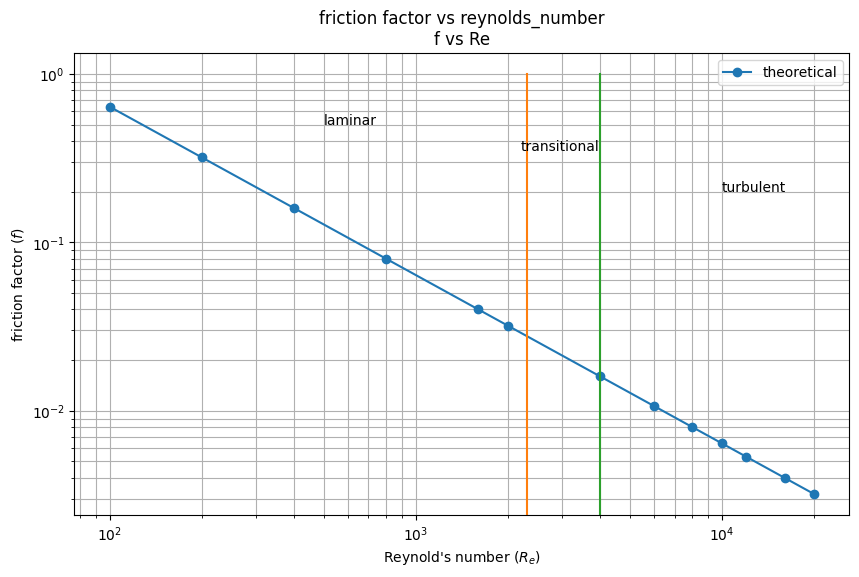

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(theoretical_values.reynolds_number, theoretical_values.friction_factor, '-o', label='theoretical')
ax.plot([2300,2300], [0, 1])
ax.plot([4000,4000], [0, 1])
ax.legend()
ax.grid(visible=True, which='both')
ax.set_xscale(value='log')
ax.set_yscale(value='log')
ax.set_title(label='friction factor vs reynolds_number\nf vs Re')
ax.set_xlabel(xlabel='Reynold\'s number ($R_e$)')
ax.set_ylabel(ylabel='friction factor ($f$)')
ax.annotate(text='turbulent', xy=(10000, 0.2), xytext=(0, 0), textcoords='offset points')
ax.annotate(text='transitional', xy=(2200, 0.35), xytext=(0, 0), textcoords='offset points')
ax.annotate(text='laminar', xy=(500, 0.5), xytext=(0, 0), textcoords='offset points')
fig.savefig(fname='{}friction_factor_vs_reynolds_number.png'.format(output_dir))

# water kinematic viscosity

In [9]:
water_kinematic_viscosity = pd.read_csv(filepath_or_buffer='./Inputs_Assessment_Task_3_Laboratory_Report/water_kinematic_viscosity.csv')
water_kinematic_viscosity.kinematic_viscosity = water_kinematic_viscosity.kinematic_viscosity*(10**-6)
water_kinematic_viscosity.to_csv(path_or_buf='{}water_kinematic_viscosity_vs_temperature.csv'.format(output_dir))
water_kinematic_viscosity

,temperature,kinematic_viscosity
0,0,1.793000e-06
1,1,1.732000e-06
2,2,1.674000e-06
3,3,1.619000e-06
4,4,1.522000e-06
5,5,1.520000e-06
6,6,1.474000e-06
7,7,1.429000e-06
8,8,1.386000e-06
9,9,1.346000e-06


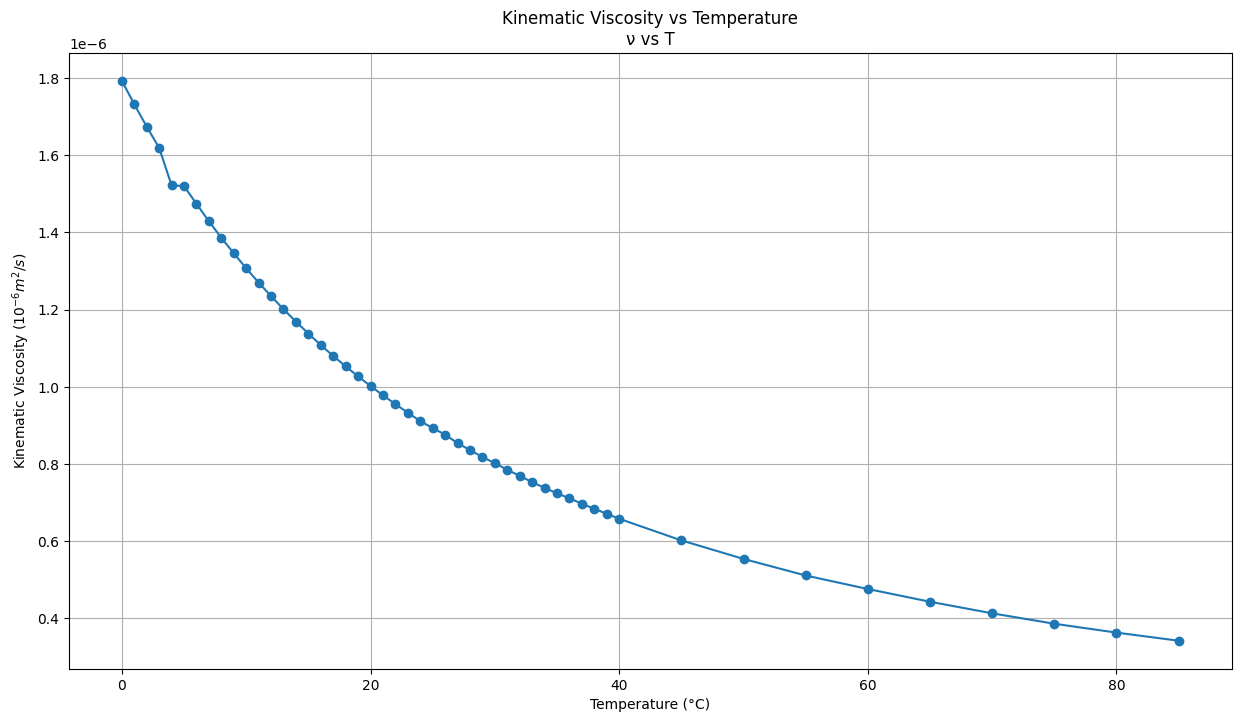

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(water_kinematic_viscosity.temperature, water_kinematic_viscosity.kinematic_viscosity, '-o', label='kinematic_viscosity')
ax.grid(visible=True, which='both')
ax.set_title(label='Kinematic Viscosity vs Temperature\n\u03BD vs T')
ax.set_xlabel(xlabel='Temperature (\N{DEGREE SIGN}C)')
ax.set_ylabel(ylabel='Kinematic Viscosity ($10^{-6} m^2/s$)')
fig.savefig(fname='{}water_kinematic_viscosity_vs_temperature.png'.format(output_dir))

# pipe properties

In [11]:
diameter = 0.003
length = 0.5
print('diameter: {}m\nlength: {}m'.format(diameter, length))

diameter: 0.003m
length: 0.5m


# calculations

In [12]:
def calculations(arg_file_path, arg_file_name, arg_output_dir=output_dir, arg_viscosity=water_kinematic_viscosity, arg_diameter=diameter, arg_length=length):

    # raw data
    test = pd.read_csv(filepath_or_buffer=arg_file_path)
    test, temperature = test.iloc[:,:-1], test.iloc[:,-1].dropna()[0]
    kinematic_viscosity = arg_viscosity[arg_viscosity.temperature == temperature].iloc[0,1]
    print(
        '='*20, arg_file_name, '-'*10, 'raw data', '-'*10,
        'Temperature: {}\N{DEGREE SIGN}C'.format(temperature),
        'Kinematic Viscosity: {} m^2/s'.format(kinematic_viscosity),
        '-'*10, test, '\n', sep='\n'
        )

    # SI units
    test.h1 = test.h1/1000
    test.h2 = test.h2/1000
    test['hl'] = test.h2 - test.h1
    test.volume = test.volume/1000
    test.time = pd.to_timedelta('00:' + test.time.astype(str))/dt.timedelta(seconds=1)
    test = test[test.columns[[0,1,2,5,3,4]]]
    test.to_csv(path_or_buf='{}SI_units_{}'.format(arg_output_dir, arg_file_name), index=False)
    print('-'*10, 'SI units data', '-'*10, test, '\n', sep='\n')

    # calculations
    test.rename(columns={'hl':'head_loss'}, inplace=True)
    test['discharge'] = (test.volume/test.time)/1000
    test['velocity'] = test.discharge/(math.pi*(arg_diameter**2)/4)
    test['friction_factor'] = test.head_loss*arg_diameter*(2*9.81)/(arg_length*(test.velocity**2))
    test['reynolds_number'] = test.velocity*arg_diameter/kinematic_viscosity
    test = test[test.columns[[0,3,4,5,6,7,8,9]]]
    test.to_csv(path_or_buf='{}calculations_{}'.format(arg_output_dir, arg_file_name), index=False)
    print('-'*10, 'calculations', '-'*10, test, '\n', sep='\n')

    # plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(test.reynolds_number, test.friction_factor, '-o', label='experimental')
    ax.plot(theoretical_values.reynolds_number, theoretical_values.friction_factor, '-o', label='theoretical')
    ax.plot([2300,2300], [0, 1])
    ax.plot([4000,4000], [0, 1])
    ax.legend()
    ax.set_xscale(value='log')
    ax.set_yscale(value='log')
    ax.grid(visible=True, which='both')
    ax.set_title(label='Friction Factor vs Reynold\'s Number\n$f$ vs $R_e$\n{}'.format(arg_file_name.split(sep='.')[0]))
    ax.set_xlabel(xlabel='Reynold\'s number ($R_e$)')
    ax.set_ylabel(ylabel='friction factor ($f$)')
    ax.annotate(text='turbulent', xy=(10000, 0.2), xytext=(0, 0), textcoords='offset points')
    ax.annotate(text='transitional', xy=(2200, 0.35), xytext=(0, 0), textcoords='offset points')
    ax.annotate(text='laminar', xy=(500, 0.5), xytext=(0, 0), textcoords='offset points')
    fig.savefig(fname='{}Plot_friction_factor_vs_reynolds_number_{}.png'.format(arg_output_dir, arg_file_name.split(sep='.')[0]))

    # plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(test.velocity, test.head_loss, '-o', label='experimental')
    ax.legend()
    ax.set_xscale(value='log')
    ax.set_yscale(value='log')
    ax.grid(visible=True, which='both')
    ax.set_title(label='Head Loss vs Velocity\n$HL$ vs $v$\n{}'.format(arg_file_name.split(sep='.')[0]))
    ax.set_xlabel(xlabel='velocity ($v$ in $m/s$)')
    ax.set_ylabel(ylabel='head loss ($HL$ in $m$)')
    fig.savefig(fname='{}Plot_head_loss_vs_velocity_{}.png'.format(arg_output_dir, arg_file_name.split(sep='.')[0]))

pipe_test_01.csv
----------
raw data
----------
Temperature: 29.0°C
Kinematic Viscosity: 8.179999999999999e-07 m^2/s
----------
   test_number   h1   h2  volume      time
0            1   63  427     255  01:00.26
1            2   80  410     245  01:00.29
2            3  103  389     230  01:00.05
3            4  119  374     215  01:00.14
4            5  141  353     185  01:00.19
5            6  162  336     165  01:00.22
6            7  180  319     145  01:00.12
7            8  201  301     105  01:00.28


----------
SI units data
----------
   test_number     h1     h2     hl  volume   time
0            1  0.063  0.427  0.364   0.255  60.26
1            2  0.080  0.410  0.330   0.245  60.29
2            3  0.103  0.389  0.286   0.230  60.05
3            4  0.119  0.374  0.255   0.215  60.14
4            5  0.141  0.353  0.212   0.185  60.19
5            6  0.162  0.336  0.174   0.165  60.22
6            7  0.180  0.319  0.139   0.145  60.12
7            8  0.201  0.301  0.100   0

0    None
1    None
2    None
dtype: object

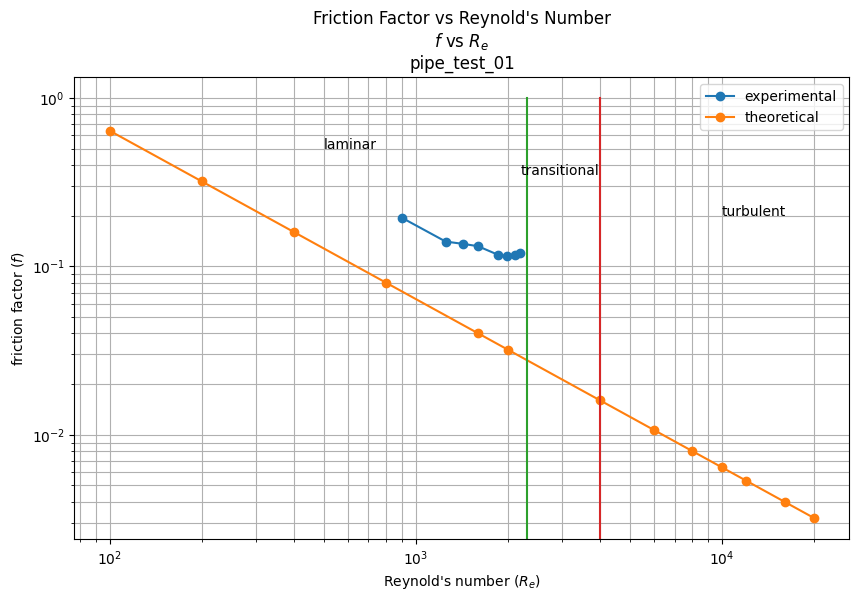

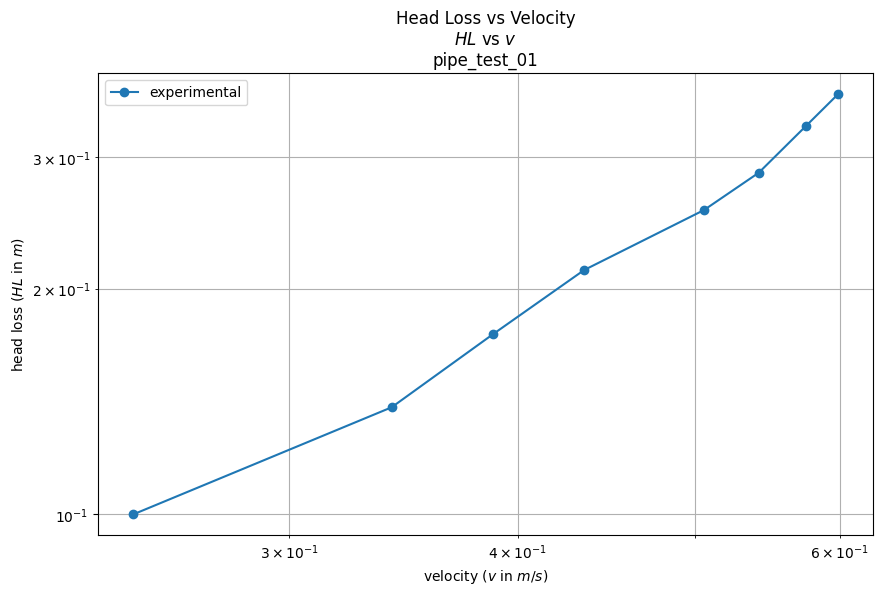

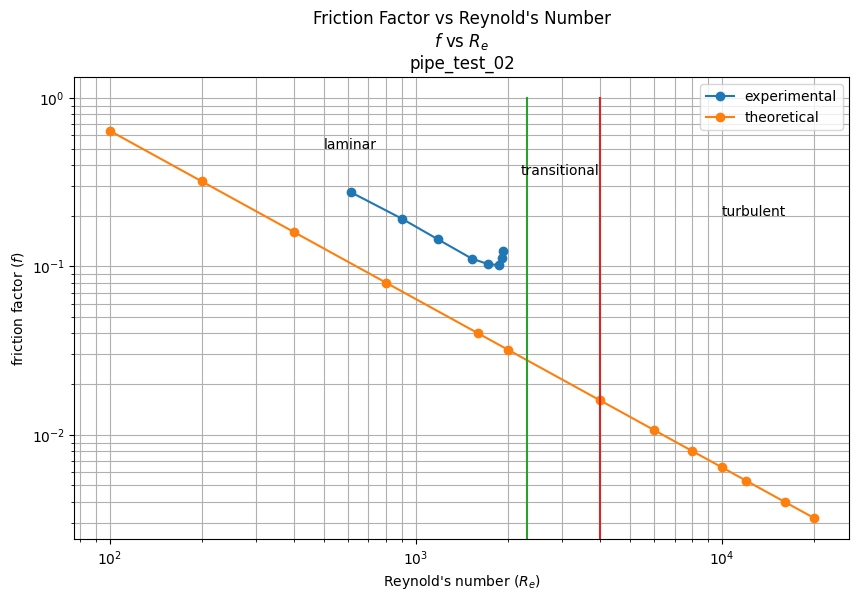

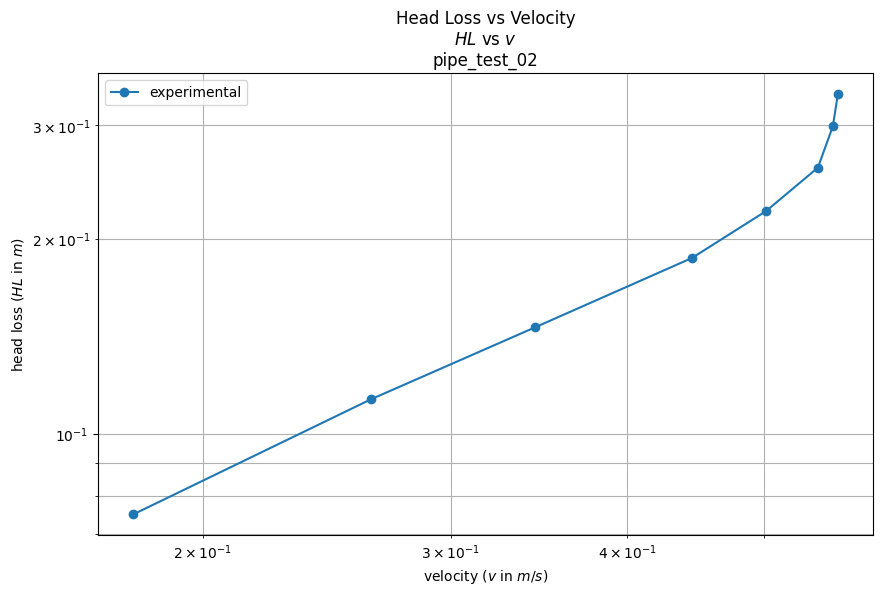

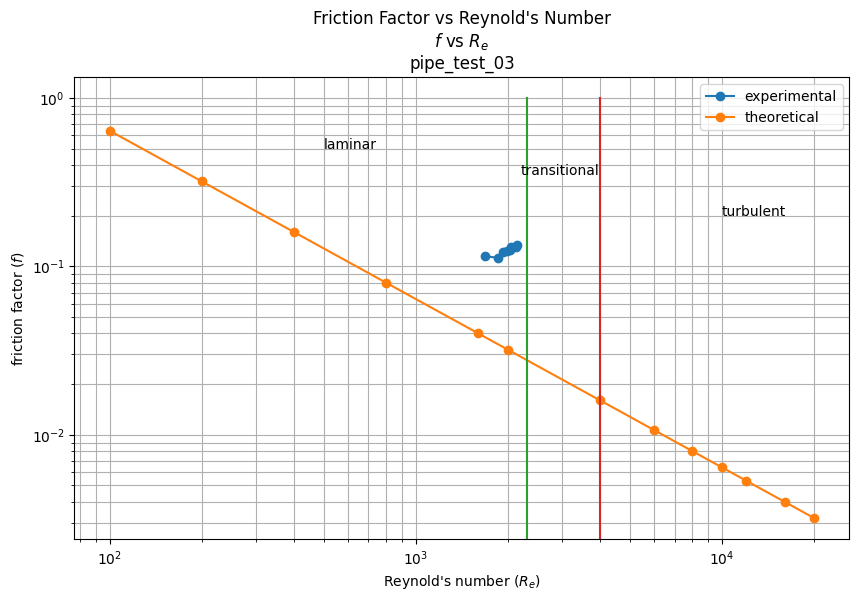

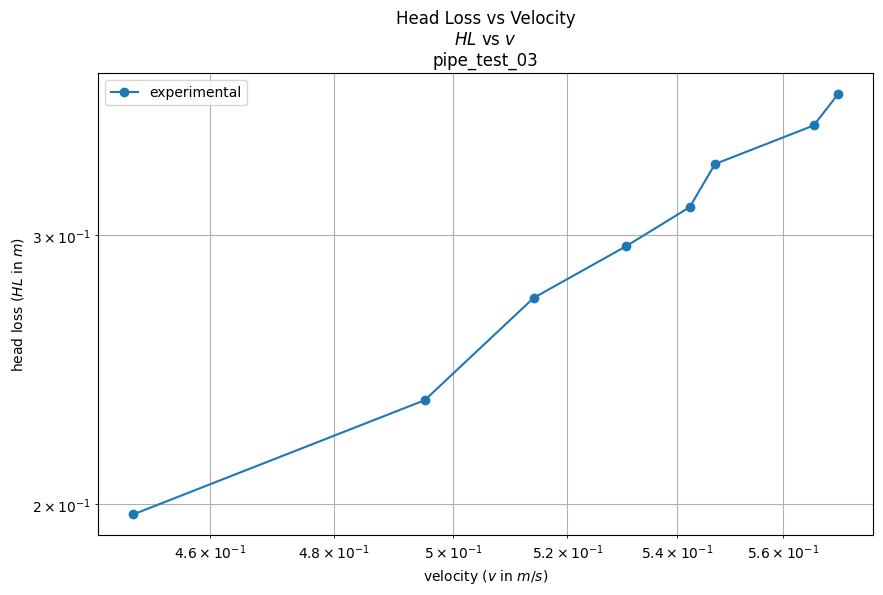

In [13]:
measurements.apply(func=lambda arg: calculations(arg.file_path, arg.file_name), axis=1)